In [2]:
model_path = '/home/ec2-user/autoencoding_beyond_pixels/out/2.celeba/arch.pickle'

In [3]:
import pickle
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
import deeppy as dp

In [4]:
import model.aegan
with open(model_path, 'rb') as f:
    model = pickle.load(f)

In [5]:
# size of latent z vector in model
n_hidden = model.latent_encoder.n_out

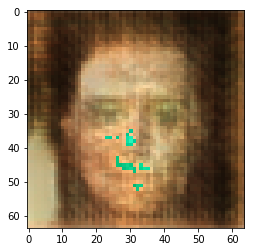

In [201]:
# draw a normal sample from z
num_samples = 1
samples_z = np.random.normal(scale=.35, size=(num_samples, n_hidden))
imgs = model.decode(samples_z.astype(dp.float_))
for i in range(num_samples):
    img = imgs[i]
    img = np.transpose(img, (1, 2, 0))
    plt.imshow(img)
    plt.show()

In [32]:
sleep(1)

NameError: name 'sleep' is not defined

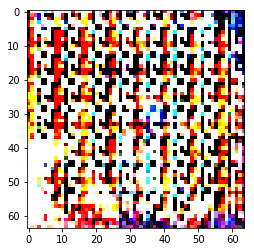

In [68]:
samples_z[0] += np.random.normal(scale=1, size=128)
imgs = model.decode(samples_z.astype(dp.float_))
img = imgs[0]
img = np.transpose(img, (1, 2, 0))
plt.imshow(img)

In [179]:
from skimage.transform import resize
from skimage.util import crop
import deeppy as dp

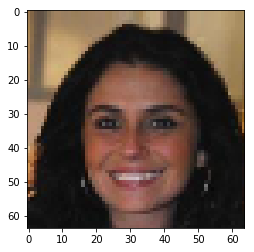

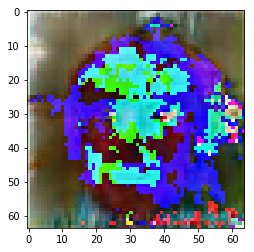

In [227]:
timg = sp.misc.imread('/home/ec2-user/autoencoding_beyond_pixels/datasets/celeba/img_align_celeba/001682.jpg')

# resize image so shorter dim is same as what model expects
dims = np.array(timg[:,:,0].shape)
scale = model_img_size / min(dims)
new_dims = (scale * dims).astype('int_')
img_resized = resize(timg, new_dims)

# now figure out which is longer dim and crop it to what model expects
long_dim = np.argmax(new_dims)
long_dim_len = max(new_dims)
long_crop = int((long_dim_len - model_img_size)/2)
# assume the crop is the first dim
crops = [[long_crop, long_crop], [0, 0]]
# swap if it's not
if (long_dim == 1): crops = list(reversed(crops))
# add a crop of 0 for third dim (which is really the channels dim)
# crop fn wants list of lists, with inner list amount to cut at 
# each edge of the dim
crops = crops + [[0, 0]]
img_cropped = crop(img_resized, crops)

# model wants channels dim first
img_for_model = np.transpose(img_cropped, (2, 0, 1))
imgs_for_model = np.expand_dims(img_for_model, axis=0)
imgs_for_model = imgs_for_model.astype(dp.float_)

decoded = model.decode(model.encode(imgs_for_model))

plt.imshow(img_cropped)
plt.show()

plt.imshow(np.transpose(decoded[0], (1, 2, 0)))
plt.show()